I have recently started DeepLearning.AI's courses. Here are my notes from the second week (Neural Networks Basics) from the first course. I hope you find them helpful.

Apologies for the pdf format. I am having a hard time getting the LaTeX to render on my site. I hope to fix this soon.

## I. Logistic Regression

### Logistic Regression Formula

Given x where $x \in {\rm I\!R}^{n_{x}}$, 

We want $\hat{y} = P(y=1| x)$
 
---
 
Parameters:
$w \in {\rm I\!R}^{n_{x}}$
$b \in {\rm I\!R}$

---
__Output option 1 (linear regression)__:
$
\hat{y} = w^T x + b
$
- $\hat{y}$ not always $\in [0,1]$ which makes classification awkward

---
__Output option 2 (logistic regression)__: $\hat{y} = \sigma(w^T x + b)$

 - Provides output in [0,1] for easy binary classification (usually $\hat{y}>0.5$ designated as class 1 and $\hat{y}\leq0.5$ designated as class 0).
 - Takes advantage of "sigmoid" equation $\sigma(z) = \frac{1}{1+e^{-z}}$ visualized below.



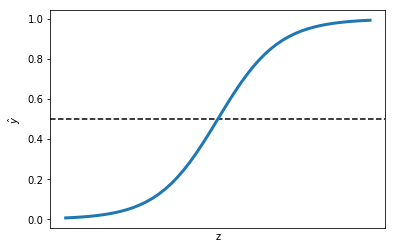

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Create z and sigma
z = np.linspace(-5,5)
sigma = 1/(1+np.exp(-z))

#Draw prediction cut-off line
plt.axhline(0.5, color='black',ls='--')

#Label axis
plt.xlabel('z')
plt.ylabel(r'$\hat{y}$')

#Plot graph
plt.tick_params(axis='x',bottom='off',labelbottom='off')
plt.plot(z,sigma,'-',lw=3);

### Logistic Regression Loss and Cost Function

__Loss Function__:<br><br>
For an individual instance, the loss function is:<br>
$L(\hat{y},y) = -(y\log\hat{y} + (1-y)\log(1-\hat{y}))$
<br><br>
Intuition: 
- If y= 1: $L(\hat{y},y) = -\log\hat{y}$ 
    - Minimizing this will ensure that $\log\hat{y}$ is large which will ensure that $\hat{y}$ is large, i.e. $\hat{y}$ close to 1.
<br>
<br>
- If y= 0: $L(\hat{y},y) = -(1-y)\log(1-\hat{y})$
    - Minimizing this will ensure that $\log(1-\hat{y})$ is large which will ensure that $\hat{y}$ is small, i.e. $\hat{y}$ close to 0.
---    
__Cost Function__:<br><br>
Across training set, the cost function is:<br>
$J(w,b)=-\frac{1}{m}\sum[y^{(i)}\log\hat{y}^{(i)} + (1-y^{(i)})\log(1-\hat{y}^{(i)})]$



### Gradient Descent

J(w,b) is a convex function so gradient descent will not get stuck on a local minimum.

---
__Gradient Descent Algorithm__:<br><br>
For cost function J(w,b) and learning rate $\alpha$, <br>
repeat {<br>
    $w:=w-\alpha\frac{J(w,b)}{\partial w}$<br>
    $b:=b-\alpha\frac{J(w,b)}{\partial b}$<br>
}

---
## II. Implementing Vectorized Logistic Regression in Python

Capital letters indicate a matrix rather than a single training instance.

### Vectorization

Vectorization is the art of removing for loops. For loops are much slower than matrix multiplication.

To create the product of W transpose and X, use numpy's .dot(X,Y) function and the .T method for transpose :

$z = np.dot(W.T,X) + b$

### Parial Derivatives

In code, we represent the partial derivatives as follows:<br>
$dw=\frac{J(w,b)}{\partial w}$<br>
$db=\frac{J(w,b)}{\partial b}$<br>

After taking partial derivatives from a computation graph, we find that $\frac{J(w,b)}{\partial z}$ (the chage in cost with respect to z) is equal to:<br>

$\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})$

And so in code, we will represent this as $dZ$.


### Single Vectorized Step of Logistic Regression

Calculate z:<br>
$z = np.dot(W.T,X)+b$<br>

Calculate A (convert z to [0,1] range with sigmoid function):<br>
$A= \sigma(z)$<br>

Calculate dZ (the change in cost with respect to z):<br>
$dZ = A-Y$<br>

Calculate w and b (weights and bias):<br>
$dw = \frac{1}{m}XdZ.T$<br>
$db = \frac{1}{m}np.sum(dZ)$

---
## III. Processing Images for Classification and Array Notes

### Image Processing

Images are stored as 3 n x m matrices of pixel intensities. To classify them we need to reshape them as a (n x m x 3, 1) array.


In [2]:
#Create dummy image
n=64
m=100

img = np.random.randn(n,m,3)

print('Shape of standard image: {}'.format(img.shape))

Shape of standard image: (64, 100, 3)


In [3]:
#Prepare for training or classification
reshaped_img = img.reshape((img.shape[0]*img.shape[1]*3,1))

print('Shape of reshaped image: {}'.format(reshaped_img.shape))

Shape of reshaped image: (19200, 1)


### Broadcasting

Broadcasting refers to automatic conversion of array shapes to allow for various calculations.

Given array of (n,m), adding/substracting/dividing/multiplying by an array or real numbers with various dimensions will convert them as follows:
- (1,n) -> (m,n) - Created by copying column m times
- (m,1) -> (m,n) - Created by copying row n times
- k -> (m,n) - Created by filling a (m,n) matrix with k.

### Rank 1 Arrays and Assert

__Avoid using rank 1 arrays__:<br>
These arrays have shape of (n,). Use reshape to give them dimension of (n,1) or (1,n) to avoid tricky bugs in code.

E.g. use:<br>
X = np.zeros((5,1))

Instead of:<br>
X = np.zeros(5)

__Use assert to check array shape:__<br>
assert(X.shape==(5,1))